<a href="https://colab.research.google.com/github/ParvePalial/FusionAnalysisofLSTMandXgboost/blob/main/Minor_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded Successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,914 (120.76 KB)

 Trainable params: 30,914 (120.76 KB)

 Non-trainable params: 0 (0.00 B)

None

🚀 Starting Training...
Epoch 1/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 0.0076 - mae: 0.0585 - val_loss: 7.6760e-04 - val_mae: 0.0182
Epoch 2/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0021 - mae: 0.0303 - val_loss: 5.3934e-04 - val_mae: 0.0144
Epoch 3/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0018 - mae: 0.0268 - val_loss: 4.7742e-04 - val_mae: 0.0141
Epoch 4/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0015 - mae: 0.0242 - val_loss: 4.4916e-04 - val_mae: 0.0126
Epoch 5/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.0015 - mae: 0.0232 - val_loss: 4.0198e-04 - val_mae: 0.0123
Epoch 6/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0014 - mae: 0.0230 - val_loss: 4.7249e-04 - val_mae: 0.0142
Epoch 7/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.0014 - mae: 0.0226 - val_loss: 4.1289e-04 - val_mae: 0.0141
Epoch 8/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.0013 - mae: 0.0214 - val_loss: 3.7469e-

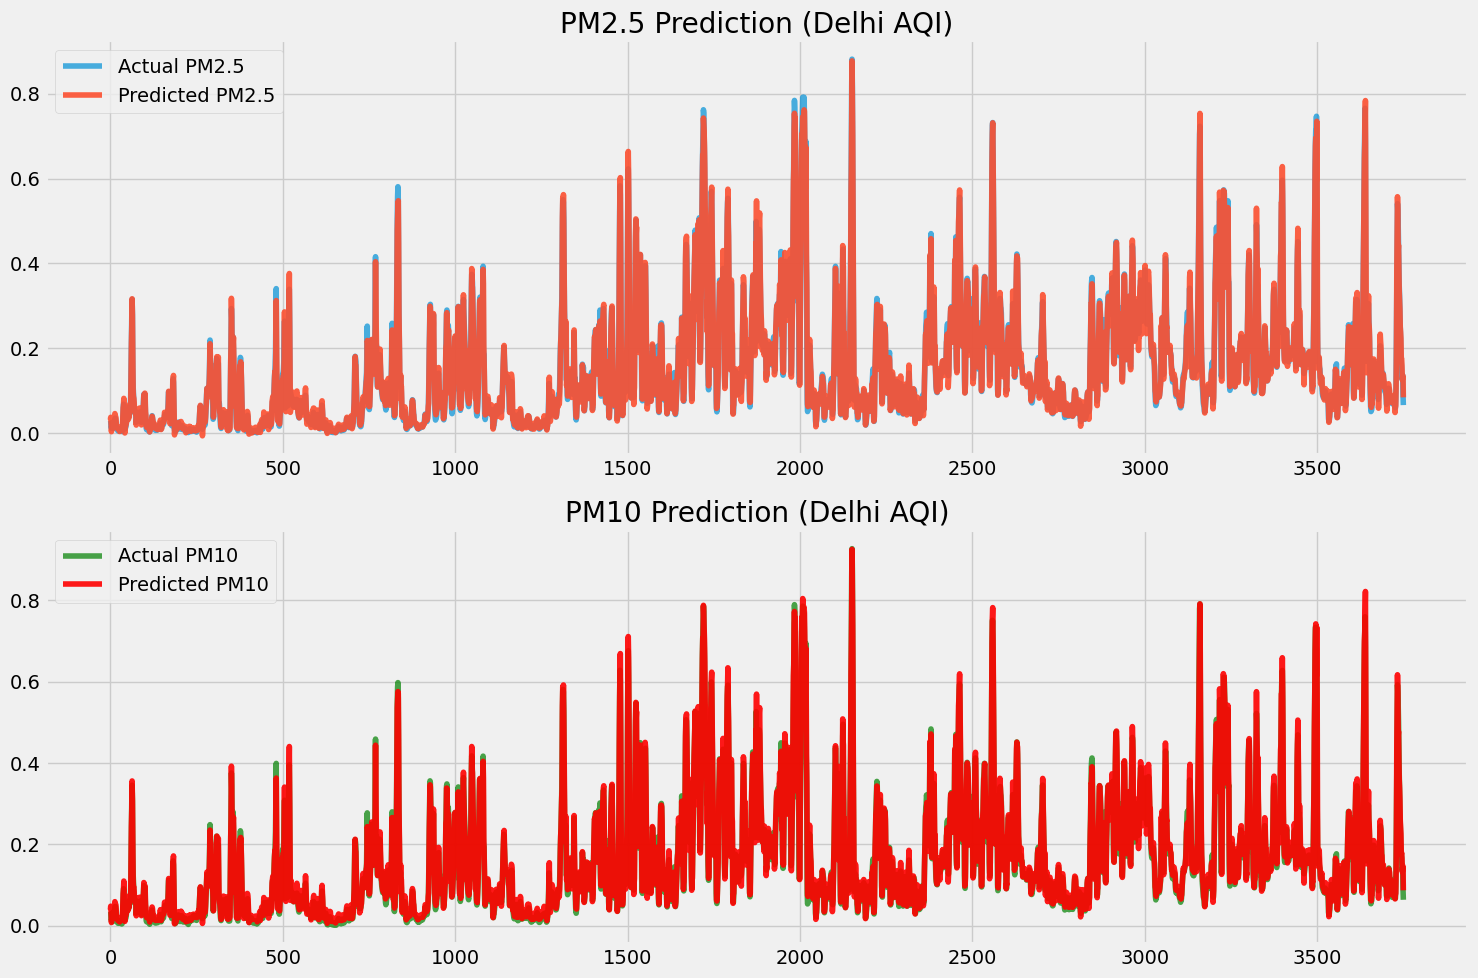

In [2]:
# @title LSTM Air Quality Prediction (PM2.5 & PM10)
# @markdown Run this cell to train the model and visualize results.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- Check for Dataset ---
if not os.path.exists("/content/sample_data/delhi_aqi.csv"):
    print("❌ ERROR: 'delhi_aqi.csv' not found!")
    print("Please upload the CSV file to the 'Files' section in the left sidebar.")
else:
    # 1. Load Dataset
    df = pd.read_csv("/content/sample_data/delhi_aqi.csv")
    print("✅ Dataset Loaded Successfully.")

    # 2. Preprocessing
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df = df.ffill()

    # 3. Feature Selection
    features = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'nh3']
    df = df[features]

    # 4. Normalization
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    # 5. Create Time-Series Sequences
    def create_sequences(data, lookback=24):
        X, y = [], []
        for i in range(len(data) - lookback):
            X.append(data[i:i + lookback])
            y.append(data[i + lookback, :2]) # Target: pm2_5 & pm10
        return np.array(X), np.array(y)

    lookback = 24
    X, y = create_sequences(scaled_data, lookback)

    # 6. Train-Test Split
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # 7. LSTM Model Structure
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(lookback, X.shape[2])),
        Dropout(0.2),
        LSTM(32),
        Dense(2)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    #
    print(model.summary())

    # 8. Train Model
    print("\n🚀 Starting Training...")
    history = model.fit(
        X_train, y_train,
        epochs=40,
        batch_size=32,
        validation_split=0.1,
        verbose=1
    )

    # 9. Evaluation
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f"\n📊 Evaluation Metrics:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    # 10. Visualization
    plt.style.use('fivethirtyeight')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    ax1.plot(y_test[:, 0], label='Actual PM2.5', alpha=0.7)
    ax1.plot(y_pred[:, 0], label='Predicted PM2.5', alpha=0.9)
    ax1.set_title('PM2.5 Prediction (Delhi AQI)')
    ax1.legend()

    ax2.plot(y_test[:, 1], label='Actual PM10', color='green', alpha=0.7)
    ax2.plot(y_pred[:, 1], label='Predicted PM10', color='red', alpha=0.9)
    ax2.set_title('PM10 Prediction (Delhi AQI)')
    ax2.legend()

    plt.tight_layout()
    plt.show()